In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import matplotlib.pyplot as plt

# Dataframe

La ciudad elegida para este trabajo fue Oakland

In [2]:
path = '../data/raw/listings.csv'
df = pd.read_csv(path)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17891,Rental unit in Hong Kong Island · ★4.76 · Stud...,69063,Candace,NaN,Central & Western,22.283270,114.149880,Entire home/apt,NaN,60,73,2017-11-29,0.44,1,0,0,NaN
1,72571,Rental unit in Sheung Wan · ★4.22 · Studio · 1...,304876,Brendan,NaN,Central & Western,22.284630,114.150540,Entire home/apt,482.0,28,151,2022-03-11,0.97,9,0,0,NaN
2,132773,Rental unit in Hong Kong Island · ★4.52 · 2 be...,304876,Brendan,NaN,Central & Western,22.289210,114.143250,Entire home/apt,1475.0,5,247,2023-12-03,1.63,9,0,24,NaN
3,163664,Rental unit in Sheung Wan · ★4.28 · 2 bedrooms...,304876,Brendan,NaN,Central & Western,22.284940,114.149010,Entire home/apt,616.0,2,225,2021-02-16,1.50,9,0,0,NaN
4,163742,Rental unit in Sheung Wan · ★4.35 · 2 bedrooms...,304876,Brendan,NaN,Central & Western,22.286570,114.148890,Entire home/apt,1210.0,4,244,2023-11-20,1.62,9,336,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7024,1049537442224124625,Bed and breakfast in Hong Kong · ★New · 1 bedr...,6763017,Rina,NaN,Central & Western,22.284917,114.151529,Private room,1737.0,1,0,NaN,NaN,42,269,0,NaN
7025,1049697550164824387,Rental unit in Hong Kong · ★New · 1 bedroom · ...,353326613,Savi,NaN,Wan Chai,22.282580,114.182910,Private room,510.0,28,0,NaN,NaN,50,242,0,NaN
7026,1049718383474111305,Rental unit in Hong Kong · ★New · 1 bedroom · ...,353326613,Savi,NaN,Wan Chai,22.282446,114.184767,Private room,476.0,28,0,NaN,NaN,50,247,0,NaN
7027,1049722164048500871,Rental unit in Hong Kong · ★New · 1 bedroom · ...,353326613,Savi,NaN,Wan Chai,22.280790,114.186290,Private room,408.0,28,0,NaN,NaN,50,244,0,NaN


## Limpieza

In [3]:
df.name.value_counts()

name
Rental unit in Hong Kong · 1 bedroom · 1 bed · 1 bath              686
Rental unit in Hong Kong · 1 bedroom · 1 bed · 1 shared bath       666
Rental unit in Hong Kong · 1 bedroom · 1 bed · 1 private bath      359
Rental unit in Hong Kong · Studio · 1 bed · 1 bath                 213
Rental unit in Hong Kong · ★New · 1 bedroom · 1 bed · 1 bath       190
                                                                  ... 
Rental unit in 九龍 · 2 bedrooms · 2 beds · 2 baths                    1
Rental unit in 九龍 · Studio · 1 bed · 1 private bath                  1
Rental unit in Hong Kong · ★4.40 · 1 bedroom · 2 beds · 1 bath       1
Rental unit in Hong Kong · ★4.75 · 1 bedroom · 1.5 shared baths      1
Hotel in Hong Kong · ★New · 2 bedrooms · 2 beds · 1 bath             1
Name: count, Length: 2598, dtype: int64

### Droppeo de columnas inutiles

In [4]:
df = df.drop(["neighbourhood_group", "license", "id", "latitude", "longitude"], axis=1)

### Codificación de variable room_type

In [5]:
enc = OrdinalEncoder()
X = [["Shared room"], ["Private room"], ["Entire home/apt"], ["Hotel room"]]
enc.fit(X)
df["room_type"]  = enc.transform(df[["room_type"]])

c:\Users\sarah\Downloads\asdf\envs\iteso\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(


### Definición de funciones

In [6]:
def bedrooms(x):
    if "bedroom" in x:
        X = x.strip().split(" ")[0]
        return X
    else:
        np.nan

In [7]:
def baths(x):
    x = x.strip()
    if x[0].isdigit():
        X = x.split(" ")[0]
    else:
        X = 1
    return float(X)

In [8]:
def bath_type(x):
    if any(char.isdigit() for char in x):
        X = x.split(" ")[2:]
        if len(X) == 2:
            X = X[0] + " " + X[1]
        else: 
            X = X[0]
    else: 
        X = x.strip()
    return X

In [9]:
def beds(x):
    if x[0].isdigit():
        X = x.split(" ")[0]
    else:
        X = 1
    return float(X)

In [10]:
def rango(x):
    if x <= 10:
        X = 0
    elif x <= 20:
        X = 1
    elif x <= 30:
        X = 2
    elif x <= 40:
        X = 3
    elif x <= 50:
        X = 4
    elif x <= 60:
        X = 5
    elif x <= 70:
        X = 6
    elif x <= 80:
        X = 7
    elif x <= 90:
        X = 8
    else:
        X = 9
    return X

In [11]:
def cantidad_casas(x):
    if x <= 5:
        X = 0
    elif x <= 10:
        X = 1
    elif x <= 20:
        X = 2
    elif x <= 40:
        X = 3
    else:
        X = 4
    return X

In [12]:
def reviews(x):
    if x <= 2:
        C = 1
    elif x <= 4:
        C = 2
    elif x <= 6:
        C = 3
    elif x <= 8:
        C = 4
    elif x <= 10:
        C = 5
    else:
        C = 6
    return C

In [13]:
def fecha(x):
    year = int(x[0])
    if len(x) == 2:
        month = int(x[1])
    
    if year > 2022:
        if year == 2023:
            if month > 6:
                X = 3
            else: 
                X = 2
    else:
        X = 0   
    return X

In [14]:
def contar_frecuencia(valor):
    return (df['host_id'] == valor).sum()

### Creación de la columna stars

In [15]:
df["stars"] = df["name"].apply(lambda x: x.split("★")[1].split("·")[0] if "★" in x else np.nan)
df["stars"] = df["stars"].apply(lambda x: np.nan if x == 'New ' else float(x) if not pd.isnull(x) else np.nan)
df["stars"] = df["stars"].apply(lambda x: round(x) if not pd.isnull(x) else np.nan)
df["stars"] = df["stars"].fillna(0)

### Typo de AirBnB

In [16]:
df["type"] = df["name"].apply(lambda x: x.split(" ")[0])
label = LabelEncoder()
label.fit(df["type"])
df["type"] = label.transform(df[["type"]])

c:\Users\sarah\Downloads\asdf\envs\iteso\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


### Cantidad de habitaciones

In [17]:
df["bedrooms"] = df["name"].apply(lambda x: x.split("·")[2] if "★" in x else x.split("·")[1])
df["bedrooms"] = df["bedrooms"].apply(lambda x: bedrooms(x))
df["bedrooms"] = df["bedrooms"].fillna(0)
df["bedrooms"] = df["bedrooms"].apply(lambda x : float(x))

### Baños y tipo de baño

In [18]:
df["baths"] = df["name"].apply(lambda x: x.split("·")[-1])
df["bath_type"] = df["baths"].apply(lambda x: bath_type(x))
df["baths"] = df["baths"].apply(lambda x: baths(x))

### Codificación de la variable bath_type

In [19]:
baths = [["Shared half-bath"], ["Half-bath"], ["shared bath"], ["shared baths"], ["Private half-bath"], ["bath"], ["baths"], ["private bath"]]
enc.fit(baths)
df["bath_type"] = enc.transform(df[["bath_type"]])

c:\Users\sarah\Downloads\asdf\envs\iteso\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(


ValueError: Found unknown categories ['beds', 'bed', 'bedroom'] in column 0 during transform

### Cantidad de camas

In [20]:
df["beds"] = df["name"].apply(lambda x: x.split("·")[-2].strip().lower())
df["beds"] = df["beds"].apply(lambda x: beds(x))

### Droppeo de columna names, ya despues de haber extraído la información importante

In [21]:
df = df.drop("name", axis=1)

### Disponibilidad convertida a meses disponible

In [22]:
df["availability_365"] = df["availability_365"].apply(lambda x: round(x/30))

### Codificación de variable neigbourhood

In [23]:
label.fit(df["neighbourhood"])
df["neighbourhood"] = label.transform(df[["neighbourhood"]])

c:\Users\sarah\Downloads\asdf\envs\iteso\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


### Reducción de valores en number_of_reviews_ltm

In [24]:
df["number_of_reviews_ltm"] = df["number_of_reviews_ltm"].apply(lambda x: rango(x))

### Reducción de valores en calculated_host_listings_count

In [25]:
df["calculated_host_listings_count"] = df["calculated_host_listings_count"].apply(lambda x: cantidad_casas(x))

### Reducción de valores en reviews_per_month

In [26]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)
df["reviews_per_month"] = df["reviews_per_month"].apply(lambda x: reviews(x))

### Clasificación de last_review

In [27]:
df["last_review"] = df["last_review"].fillna(0)
df["last_review"] = df["last_review"].apply(lambda x: str(x).split("-")[0:2])
df["last_review"] = df["last_review"].apply(lambda x: fecha(x))

### Reducción de valores en number_of_reviews

In [28]:
df["number_of_reviews"] = df["number_of_reviews"].apply(lambda x: 0 if x <= 20 else 1 if x <= 50 else 2 if x <= 100 else 3 if x<= 200 else 4 if x <= 300 else 5 if x <= 500 else 6)

### Cetgorización minimum nights

In [29]:
quantile_75 = np.quantile(df["minimum_nights"], 0.75)
df["minimum_nights"] = df["minimum_nights"].apply(lambda x: 0 if x <= quantile_75 else 1 if x <= quantile_75*1.5 else 2 if x <= quantile_75*3 else 3)

### Categorización de price

In [30]:
median_price = df["price"].median()
df["price"] = df["price"].fillna(median_price)
quantile_price = np.quantile(df["price"], 0.75)
df["price"] = df["price"].apply(lambda x: 0 if x <= quantile_price else 1 if x <= quantile_price*1.5 else 2 if x <= quantile_price*3 else 3 if x > quantile_price else x)

### Conteo de Host

In [31]:
df['frecuencia_host'] = df['host_id'].apply(lambda x: contar_frecuencia(x))
df = df.drop(["host_id", "host_name"], axis=1)

### Normalización 

In [32]:
df = (df - df.mean()) / df.std()

TypeError: Could not convert ['bathbathbathbathbathbathbathsbathbathsbathsbathshared bathsshared bathsshared bathsshared bathsprivate bathprivate bathprivate bathbathbathsbathshared bathsshared bathsprivate bathbathsbathbathprivate bathbathshared bathsbathsbathbathbathbathbathbathbathbathbedbedbathbathbathbathbathbathshared bathsbathbathbathbathbedbathsbathbathsbedroombathshared bathbedshared bathshared bathbathbathprivate bathbathbedbathbedshared bathbedbathshared bathbathbathbathbathbathsbathbathsprivate bathbathbathsbathbathbathbathbathbathbathsbathbathbathbathbathbathbathbathbathprivate bathshared bathshared bathbathbathsbathbathbathbathbathbathbathbathsbathbathbathbathshared bathbathsshared bathsbathbathbathbathbathbathbathbathshared bathbathbathbathbathbathbathbathprivate bathbathbathbathsbathbathbathbathbathbathbathbathbathsbathbathprivate bathbathbathbathbathbathshared bathshared bathshared bathbathsbathshared bathbathprivate bathprivate bathbathprivate bathbathsshared bathbathprivate bathprivate bathprivate bathprivate bathbathbathbathbathsbathsshared bathbathshared bathbathbathbathbathbathbathbathbathbathbathbathbathbathbathprivate bathshared bathprivate bathbathbathbathbathbathbathbathbathbathbathbathprivate bathprivate bathshared bathprivate bathbathshared bathshared bathsbathbathbathshared bathsbathbathprivate bathprivate bathbathshared bathbathbathprivate bathprivate bathprivate bathbathbathshared bathbathsbathsprivate bathprivate bathshared bathshared bathsshared bathsbathbathbathsbathbathshared bathsshared bathsshared bathbathbathbathbathbathshared bathbathbathsbathshared bathshared bathsshared bathsshared bathsshared bathbathbathsbathsbathbathbathprivate bathprivate bathbathbathbathbathprivate bathprivate bathprivate bathprivate bathbathbathbathbathprivate bathprivate bathprivate bathshared bathbathshared bathbathbathprivate bathbathshared bathbathshared bathsbathprivate bathprivate bathbathbathbathprivate bathshared bathprivate bathshared bathshared bathbathbathshared bathbathsbathsprivate bathshared bathsbathbathbathsbathprivate bathbathbathbathbathbathbathbathbathbathsshared bathbathsbathbathprivate bathbathbathbathsprivate bathbathshared bathbathbathsshared bathshared bathbathsprivate bathshared bathprivate bathbathsprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathbathsbathbathbathbathbathbathshared bathshared bathprivate bathshared bathsbathbathbathshared bathbathsprivate bathshared bathsprivate bathshared bathprivate bathprivate bathbathshared bathbathbathsprivate bathprivate bathbathbathbathbathprivate bathprivate bathbathbathbathbathbathbathbathbathbathbathbathbathsbathbathsbathprivate bathbathbathprivate bathshared bathsshared bathsshared bathshared bathbathshared bathprivate bathbathprivate bathbathshared bathprivate bathbathbathsshared bathshared bathprivate bathbathbathsbathbathbathbathprivate bathprivate bathbathbathbathsbathbathbathbathbathprivate bathbathbathbathbathshared bathsprivate bathprivate bathprivate bathprivate bathshared bathprivate bathbathshared bathbathprivate bathbathbathbathbathbathbathbathshared bathbathbathshared bathbathbathbathbathbathprivate bathbathsshared bathbathshared bathsprivate bathprivate bathbathsShared half-bathshared bathprivate bathprivate bathprivate bathprivate bathbathbathbathshared bathbathShared half-bathbathbathbathbathbathsbathshared bathprivate bathshared bathbathsbathsbathsbathsbathshared bathshared bathprivate bathshared bathshared bathbathbathbathbathshared bathsbathbathbathsbathsbathbathprivate bathbathprivate bathbathbathsbathbathbathbathshared bathbathbathshared bathbathbathprivate bathbathbathsshared bathsbathshared bathbathbathbathbathshared bathprivate bathbathsbathbathbathshared bathbathbathbathbathprivate bathprivate bathprivate bathbathprivate bathbathbathbathbathbathshared bathbathbathbathbathshared bathbathsbathshared bathsprivate bathPrivate half-bathshared bathshared bathprivate bathbathprivate bathprivate bathprivate bathbathshared bathbathbathsbathsshared bathbathsbathbathbathbathshared bathbathbathbathbathbathbathbathbathprivate bathprivate bathbathprivate bathshared bathbathbathbathprivate bathbathbathsbathbathprivate bathbathshared bathbathshared bathsshared bathsshared bathsbathprivate bathPrivate half-bathbathbathbathbathshared bathsbathsbathbathbathbathbathbathprivate bathshared bathbathbathbathbathbathbathbathshared bathbathbathshared bathshared bathbathbathprivate bathbathbathsbathbathbathbathbathsbathshared bathbathbathsprivate bathshared bathbathbathbathshared bathshared bathsbathprivate bathshared bathbathbathbathbathshared bathshared bathshared bathshared bathbathPrivate half-bathbathshared bathshared bathbathprivate bathbathsshared bathshared bathshared bathshared bathsprivate bathbathsbathsshared bathshared bathsprivate bathshared bathprivate bathprivate bathshared bathprivate bathbathbathsshared bathsshared bathprivate bathbathsbathsbathbathprivate bathshared bathshared bathprivate bathbathsbathsprivate bathprivate bathprivate bathprivate bathbathbathbathbathbathbathshared bathsprivate bathbathbathbathbathshared bathshared bathprivate bathprivate bathbathshared bathshared bathbathshared bathshared bathshared bathprivate bathprivate bathprivate bathprivate bathprivate bathshared bathshared bathshared bathprivate bathshared bathsshared bathsshared bathsshared bathsshared bathsbathbathbathbathbathbathbathsbathprivate bathbathshared bathsbathbathbathbathbathsprivate bathprivate bathprivate bathshared bathbathsbathshared bathbathshared bathbathsshared bathbathsprivate bathbathprivate bathbathbathbathbathsshared bathbathprivate bathbathbathsbathsbathprivate bathbathbathshared bathsbathprivate bathbathbathprivate bathbathbathsbathprivate bathbathbathbathshared bathsshared bathshared bathbathshared bathsbathbathshared bathsbathbathshared bathsbathbathbathbathshared bathbathshared bathbathbathshared bathbathbathsbathsbathbathshared bathsbathbathprivate bathbathbathbathbathbathbathbathbathbathbathbathsbathsshared bathsprivate bathprivate bathprivate bathshared bathbathsbathshared bathsbathshared bathbathbathbathbathbathbathsbathsbathbathsprivate bathprivate bathshared bathsbathshared bathsshared bathprivate bathbathsbathsbathsbathprivate bathprivate bathshared bathbathprivate bathshared bathprivate bathshared bathsshared bathbathbathprivate bathbathsbathbathshared bathbathsbathsshared bathbathsbathshared bathsbathbathbathbathshared bathbathsshared bathshared bathbathsprivate bathbathsbathsbathshared bathsbathbathbathbathbathbathbathsbathbathbathbathshared bathbathbathbathsshared bathshared bathshared bathsshared bathbathbathshared bathshared bathbathbathbathbathbathbathbathshared bathshared bathsbathshared bathshared bathprivate bathprivate bathbathsbathbathsshared bathbathbathsbathshared bathprivate bathshared bathbathprivate bathshared bathsprivate bathbathsprivate bathshared bathshared bathshared bathprivate bathprivate bathprivate bathshared bathshared bathbathbathshared bathshared bathbathsbathprivate bathprivate bathshared bathshared bathbathsbathbathbathbathbathbathprivate bathshared bathbathprivate bathshared bathshared bathbathbathprivate bathbathsbathsshared bathprivate bathprivate bathprivate bathbathshared bathprivate bathprivate bathprivate bathprivate bathprivate bathbathbathbathprivate bathprivate bathprivate bathbathbathsbathprivate bathshared bathprivate bathshared bathbathsbathshared bathbathsbathshared bathbathshared bathbathprivate bathshared bathshared bathbathsbathsbathshared bathshared bathprivate bathprivate bathbathbathbathbathbathbathShared half-bathshared bathbathbathsbathsprivate bathbathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathbathsprivate bathshared bathprivate bathbathbathsbathbathsprivate bathbathshared bathbathsbathsshared bathprivate bathbathbathshared bathbathbathsprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathbathprivate bathshared bathsbathbathbathprivate bathbathsbathbathbathbathbathbathbathbathprivate bathbathprivate bathbathbathbathbathbathbathshared bathshared bathshared bathbathshared bathshared bathbathbathbathbathshared bathshared bathshared bathsshared bathsshared bathsbathbathshared bathshared bathsshared bathshared bathshared bathshared bathshared bathShared half-bathprivate bathshared bathshared bathshared bathshared bathprivate bathprivate bathbathbathprivate bathbathshared bathbathsprivate bathshared bathshared bathshared bathshared bathprivate bathprivate bathprivate bathprivate bathshared bathshared bathshared bathbathbathshared bathshared bathshared bathbathsbathshared bathbathshared bathbathprivate bathbathshared bathshared bathprivate bathbathprivate bathshared bathprivate bathbathsshared bathbathshared bathbathbathshared bathsshared bathprivate bathbathsshared bathprivate bathbathprivate bathprivate bathprivate bathshared bathshared bathshared bathprivate bathprivate bathshared bathshared bathsshared bathsbathsbathshared bathbathbathprivate bathprivate bathshared bathprivate bathprivate bathbathprivate bathbathshared bathbathbathbathprivate bathprivate bathprivate bathshared bathsprivate bathshared bathbathbathbathshared bathprivate bathshared bathsshared bathbathprivate bathprivate bathprivate bathprivate bathbathprivate bathbathshared bathprivate bathshared bathprivate bathbathprivate bathprivate bathprivate bathshared bathbathbathbathbathshared bathprivate bathprivate bathprivate bathbathprivate bathprivate bathprivate bathbathbathprivate bathprivate bathprivate bathshared bathshared bathprivate bathshared bathshared bathsbathbathsbathbathsshared bathbathprivate bathbathprivate bathprivate bathshared bathsbathbathsprivate bathprivate bathprivate bathbathsprivate bathbathprivate bathshared bathbathbathbathprivate bathbathshared bathsbathsbathbathsbathshared bathshared bathsbathbathsshared bathbathshared bathbathshared bathsbathbathsbathsbathprivate bathbathshared bathbathbathprivate bathbathsshared bathshared bathprivate bathbathbathbathbathbathbathprivate bathbathbathshared bathprivate bathbathshared bathbathprivate bathbathshared bathprivate bathshared bathbathsbathbathshared bathshared bathbathsshared bathprivate bathbathprivate bathshared bathshared bathshared bathprivate bathshared bathsshared bathprivate bathshared bathshared bathsbathsshared bathbathsprivate bathprivate bathbathbathbathbathprivate bathbathsprivate bathprivate bathbathshared bathshared bathHalf-bathprivate bathshared bathbathprivate bathprivate bathprivate bathbathsbathprivate bathprivate bathshared bathbathprivate bathprivate bathbathbathprivate bathbathsprivate bathbathbathprivate bathbathsbathshared bathshared bathsbathbathprivate bathprivate bathprivate bathbathsbathprivate bathprivate bathbathbathsshared bathbathbathprivate bathprivate bathbathbathsprivate bathshared bathsshared bathbathbathbathshared bathshared bathshared bathbathsshared bathshared bathsbathbathprivate bathbathsshared bathprivate bathbathsbathbathsshared bathbathshared bathbathsbathprivate bathprivate bathprivate bathprivate bathshared bathbathbathbathbathbathshared bathbathsshared bathshared bathbathbathbathshared bathsbathbathbathprivate bathshared bathshared bathshared bathshared bathbathsprivate bathshared bathshared bathshared bathshared bathprivate bathprivate bathprivate bathprivate bathshared bathshared bathshared bathsbathbathprivate bathprivate bathshared bathshared bathbathshared bathshared bathshared bathshared bathshared bathbathsbathsprivate bathbathshared bathshared bathbathsbathsshared bathbathshared bathbathbathbathprivate bathshared bathshared bathshared bathshared bathprivate bathprivate bathbathshared bathshared bathbathbathbathbathprivate bathbathbathbathbathbathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathbathshared bathbathshared bathshared bathsshared bathbathshared bathbathbathshared bathshared bathbathshared bathprivate bathbathprivate bathbathbathbathprivate bathprivate bathprivate bathprivate bathbathshared bathshared bathshared bathshared bathprivate bathprivate bathbathsshared bathshared bathbathsprivate bathshared bathbathbathbathbathbathbathsshared bathbathbathshared bathprivate bathbathshared bathbathbathshared bathshared bathshared bathbathprivate bathshared bathprivate bathbathbathshared bathsshared bathshared bathshared bathbathshared bathshared bathbathprivate bathbathsshared bathsbathshared bathshared bathprivate bathshared bathbathbathbathsshared bathprivate bathshared bathbathbathbathsprivate bathshared bathsshared bathsbathshared bathshared bathbathshared bathbathbathbathsbathbathbathprivate bathbathshared bathprivate bathprivate bathbathshared bathshared bathshared bathbathprivate bathshared bathbathshared bathshared bathshared bathshared bathsbathshared bathshared bathshared bathshared bathshared bathprivate bathprivate bathprivate bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathbathbathshared bathshared bathprivate bathprivate bathshared bathsshared bathshared bathshared bathsbathshared bathshared bathbathshared bathshared bathsshared bathsshared bathsshared bathshared bathshared bathbathsbathsshared bathprivate bathshared bathshared bathshared bathshared bathbathsbathshared bathshared bathbathprivate bathbathsbathsbathprivate bathbathsshared bathshared bathbathbathprivate bathshared bathprivate bathprivate bathprivate bathshared bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathshared bathsbathsbathsbathsbathsbathsbathsbathsshared bathsbathbathshared bathbathshared bathsshared bathprivate bathshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathbathbathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathbathbathshared bathshared bathbathshared bathshared bathshared bathbathbathbathprivate bathshared bathsshared bathshared bathprivate bathshared bathshared bathshared bathbathsshared bathshared bathsshared bathbathshared bathsshared bathsbathshared bathshared bathsbathsshared bathprivate bathbathshared bathbathbathbathprivate bathshared bathsbathshared bathshared bathprivate bathshared bathprivate bathprivate bathshared bathshared bathshared bathbathbathbathshared bathbathbathbathbathbathbathsbathbathbathbathshared bathsbathshared bathprivate bathbathbathshared bathshared bathprivate bathshared bathprivate bathbathshared bathbathbathprivate bathbathshared bathshared bathbathshared bathshared bathshared bathbathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathshared bathprivate bathbathprivate bathprivate bathshared bathbathsshared bathshared bathbathshared bathprivate bathshared bathshared bathprivate bathshared bathbathbathbathbathbathshared bathprivate bathbathbathshared bathprivate bathbathbathbathbathshared bathshared bathbathbathprivate bathprivate bathprivate bathbathbathshared bathshared bathbathbathshared bathsbathbathshared bathbathbathprivate bathprivate bathbathshared bathshared bathbathprivate bathbathbathbathbathbathprivate bathprivate bathprivate bathbathprivate bathprivate bathbathsshared bathbathshared bathprivate bathbathshared bathbathbathbathbathshared bathshared bathshared bathshared bathshared bathbathsbathsshared bathsbathbathprivate bathbathbathbathbathbathbathbathbathbathbathbathbathshared bathbathsbathshared bathbathsshared bathsprivate bathbathbathbathsprivate bathprivate bathshared bathbathbathbathbathbathprivate bathbathshared bathbathshared bathprivate bathshared bathbathsprivate bathshared bathshared bathbathshared bathshared bathbathbathbathshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsshared bathshared bathshared bathshared bathprivate bathprivate bathshared bathshared bathbathsshared bathshared bathbathsbathsshared bathshared bathshared bathbathshared bathbathshared bathshared bathsbathshared bathshared bathbathbathbathshared bathshared bathshared bathsbathshared bathbathbathshared bathsshared bathshared bathshared bathshared bathshared bathbathbathbathprivate bathbathprivate bathbathbathshared bathprivate bathshared bathprivate bathprivate bathbathbathbathshared bathsbathshared bathbathprivate bathbathshared bathbathbathbathbathbathprivate bathbathbathbathprivate bathprivate bathshared bathprivate bathprivate bathbathprivate bathprivate bathbathbathbathbathbathbathbathbathbathbathbathshared bathbathshared bathbathprivate bathprivate bathprivate bathprivate bathprivate bathbathsprivate bathshared bathprivate bathshared bathbathbathbathsshared bathsprivate bathprivate bathbathbathbathshared bathshared bathbathshared bathbathprivate bathbathsbathbathshared bathbathbathshared bathbathsbathsbathprivate bathbathprivate bathshared bathbathbathshared bathbathbathshared bathshared bathshared bathshared bathshared bathshared bathbathshared bathbathshared bathshared bathshared bathshared bathshared bathshared bathshared bathbathbathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathbathsshared bathHalf-bathbathsbathshared bathshared bathshared bathshared bathshared bathbathprivate bathprivate bathbathshared bathshared bathshared bathbathbathbathprivate bathprivate bathbathprivate bathbathsshared bathsshared bathbathbathbathshared bathbathbathshared bathbathbathbathbathsshared bathbathbathshared bathshared bathshared bathshared bathsshared bathbathshared bathbathbathbathbathbathsshared bathbathbathshared bathbathbathbathbathshared bathprivate bathprivate bathshared bathprivate bathshared bathshared bathbathbathbathshared bathshared bathshared bathbathbathbathprivate bathprivate bathprivate bathbathbathshared bathsbathshared bathshared bathshared bathshared bathbathshared bathbathbathprivate bathbathsbathbathbathbathsbathbathbathshared bathbathshared bathbathbathbathshared bathbathbathshared bathbathshared bathsbathbathbathshared bathprivate bathbathprivate bathbathprivate bathprivate bathprivate bathprivate bathshared bathbathprivate bathbathsshared bathbathbathshared bathbathsbathprivate bathprivate bathprivate bathbathsbathbathbathshared bathprivate bathbathsbathsbathbathbathbathsbathprivate bathbathbathsshared bathprivate bathbathbathbathsshared bathshared bathshared bathshared bathsshared bathsshared bathsbathsprivate bathbathbathbathshared bathShared half-bathprivate bathshared bathsprivate bathprivate bathbathbathsshared bathshared bathshared bathbathshared bathbathshared bathbathbathprivate bathshared bathshared bathbathshared bathbathsbathbathprivate bathprivate bathprivate bathprivate bathprivate bathbathbathprivate bathprivate bathshared bathbathprivate bathprivate bathbathbathprivate bathbathshared bathbathbathbathbathshared bathbathshared bathbathbathshared bathshared bathbathbathsshared bathshared bathshared bathshared bathbathbathbathbathbathbathbathbathbathsbathbathbathshared bathbathprivate bathshared bathbathbathbathbathbathbathbathbathbathshared bathprivate bathbathshared bathshared bathsbathbathshared bathshared bathbathprivate bathbathprivate bathbathbathsbathsshared bathsshared bathsshared bathbathsbathprivate bathshared bathshared bathbathshared bathbathbathshared bathbathprivate bathprivate bathbathsprivate bathshared bathshared bathbathsbathsbathbathbathbathbathprivate bathshared bathsshared bathprivate bathprivate bathprivate bathprivate bathbathsbathprivate bathbathbathshared bathbathbathbathbathsshared bathbathsshared bathbathbathbathshared bathsbathbathbathbathshared bathbathbathshared bathbathshared bathsshared bathbathshared bathshared bathprivate bathPrivate half-bathbathprivate bathprivate bathbathbathshared bathbathprivate bathprivate bathprivate bathbathsprivate bathprivate bathshared bathshared bathprivate bathbathbathsshared bathshared bathbathsprivate bathbathbathbathshared bathprivate bathbathsbathshared bathsbathprivate bathbathbathprivate bathbathbathshared bathbathbathbathshared bathsbathshared bathbathbathprivate bathbathshared bathbathbathshared bathbathbathbathbathbathshared bathbathbathshared bathsbathbathshared bathsbathbathshared bathbathsbathsbathsshared bathsshared bathbathshared bathprivate bathprivate bathbathbathsshared bathshared bathshared bathprivate bathshared bathbathbathshared bathshared bathbathsbathshared bathprivate bathbathsbathsbathbathshared bathbathbathsbathbathshared bathprivate bathshared bathshared bathbathbathbathshared bathshared bathshared bathprivate bathshared bathprivate bathprivate bathbathshared bathbathsbathsprivate bathbathprivate bathprivate bathbathbathbathbathsshared bathshared bathsshared bathsshared bathsbathbathshared bathbathbathbathsbathsbathbathbathbathshared bathshared bathbathbathbathbathbathbathbathbathbathsbathsbathsbathbathbathsbathbathbathbathprivate bathshared bathbathprivate bathshared bathbathbathbathprivate bathbathprivate bathbathbathbathbathbathbathbathsbathbathbathbathbathbathsshared bathbathbathbathbathsshared bathprivate bathshared bathbathbathsbathbathsprivate bathprivate bathprivate bathbathbathbathbathbathbathbathbathbathbathbathshared bathbathbathshared bathshared bathshared bathprivate bathbathbathbathbathbathshared bathbathbathbathshared bathshared bathshared bathbathbathsbathsbathprivate bathshared bathbathbathsshared bathsbathbathshared bathbathbathshared bathbathsbathbathprivate bathbathsbathsbathbathshared bathbathbathbathbathshared bathbathbathbathsbathprivate bathbathbathsbathshared bathprivate bathprivate bathbathbathbathsshared bathshared bathbathshared bathshared bathbathbathsbathbathbathbathbathsbathbathbathsbathshared bathshared bathbathbathsshared bathshared bathsbathbathbathbathbathbathbathsbathprivate bathbathshared bathsbathbathbathbathsbathbathbathprivate bathshared bathsshared bathsshared bathbathbathbathbathsshared bathHalf-bathprivate bathprivate bathprivate bathprivate bathbathbathprivate bathbathbathshared bathsbathbathbathsbathbathsshared bathbathprivate bathbathbathbathbathprivate bathbathbathbathsbathbathbathbathprivate bathbathbathsbathbathbathbathprivate bathprivate bathprivate bathbathbathsprivate bathshared bathprivate bathbathprivate bathbathprivate bathbathsbathsbathsbathsshared bathsbathbathshared bathshared bathshared bathsshared bathsbathbathsprivate bathbathsprivate bathbathshared bathbathprivate bathbathbathshared bathsbathbathprivate bathbathbathbathbathbathbathbathbathbathbathsshared bathbathsbathbathbathbathsprivate bathbathbathsshared bathshared bathshared bathsbathbathbathbathbathbathbathbathbathbathprivate bathprivate bathbathbathshared bathbathshared bathbathbathsprivate bathbathshared bathbathbathshared bathshared bathbathbathbathsprivate bathprivate bathbathsshared bathbathsshared bathprivate bathbathsbathbathbathbathbathbathbathbathbathbathbathprivate bathprivate bathbathshared bathbathbathbathbathbathbathbathbathshared bathbathbathbathsbathbathbathbathshared bathprivate bathprivate bathshared bathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathshared bathbathbathbathbathbathshared bathbathbathbathbathshared bathbathshared bathbathbathprivate bathshared bathsbathshared bathshared bathshared bathbathbathshared bathbathbathbathshared bathbathbathbathbathprivate bathshared bathshared bathsshared bathsbathsbathshared bathbathbathshared bathsshared bathbathshared bathbathbathshared bathshared bathsbathshared bathbathbathbathbathshared bathshared bathsshared bathshared bathshared bathshared bathbathbathbathbathshared bathshared bathshared bathbathshared bathshared bathbathbathbathbathshared bathshared bathshared bathbathbathbathsbathbathbathshared bathbathbathshared bathbathshared bathshared bathshared bathbathbathshared bathbathsbathshared bathshared bathsprivate bathshared bathsshared bathshared bathshared bathshared bathshared bathbathbathbathsshared bathsshared bathshared bathshared bathsbathbathshared bathbathbathprivate bathbathsbathsbathshared bathbathbathshared bathsbathsbathbathbathshared bathprivate bathshared bathbathsshared bathsshared bathsshared bathsshared bathsshared bathsbathshared bathprivate bathprivate bathprivate bathprivate bathshared bathshared bathsshared bathshared bathbathshared bathbathbathsbathsbathsbathshared bathshared bathbathshared bathshared bathbathbathbathbathbathsbathbathprivate bathbathbathprivate bathshared bathprivate bathprivate bathshared bathbathprivate bathbathshared bathbathsbathsbathsbathshared bathbathsbathbathsbathbathshared bathshared bathshared bathshared bathshared bathbathshared bathbathshared bathbathshared bathshared bathsprivate bathshared bathprivate bathbathsshared bathsshared bathsbathshared bathsshared bathbathprivate bathbathprivate bathbathprivate bathbathshared bathbathshared bathshared bathbathbathbathshared bathbathbathbathshared bathprivate bathshared bathprivate bathshared bathbathshared bathshared bathshared bathprivate bathprivate bathbathbathbathbathbathshared bathshared bathprivate bathshared bathshared bathbathbathbathbathbathbathsprivate bathbathbathprivate bathbathshared bathsshared bathbathbathshared bathsshared bathsbathprivate bathbathbathbathbathshared bathbathbathbathsbathbathbathbathprivate bathprivate bathprivate bathshared bathsshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathprivate bathprivate bathprivate bathprivate bathprivate bathshared bathsbathshared bathbathsshared bathsbathbathbathshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsbathprivate bathprivate bathprivate bathbathbathbathbathbathbathbathbathbathshared bathbathbathbathbathbathshared bathsshared bathsbathsbathbathshared bathsbathprivate bathbathsbathbathbathbathbathbathshared bathbathsprivate bathbathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathbathbathbathsbathsprivate bathbathsbathprivate bathbathshared bathprivate bathprivate bathbathbathsbathsbathbathbathprivate bathbathbathprivate bathprivate bathprivate bathshared bathbathbathprivate bathprivate bathbathsbathbathbathbathbathprivate bathprivate bathshared bathbathbathbathbathshared bathbathbathprivate bathprivate bathPrivate half-bathbathsbathbathbathprivate bathbathprivate bathprivate bathbathbathprivate bathshared bathsshared bathsshared bathprivate bathprivate bathprivate bathbathsshared bathbathshared bathshared bathprivate bathprivate bathbathbathbathbathsbathbathsbathbathbathbathprivate bathprivate bathshared bathbathsbathbathprivate bathbathprivate bathprivate bathbathsbathbathbathshared bathprivate bathprivate bathbathsbathbathbathbathbathshared bathsbathbathbathbathbathsbathbathsbathbathshared bathprivate bathprivate bathshared bathsprivate bathbathsbathbathbathprivate bathprivate bathbathshared bathsbathsprivate bathbathsshared bathbathprivate bathbathbathbathbathprivate bathprivate bathprivate bathbathbathbathbathbathbathbathbathsbathbathbathprivate bathprivate bathbathbathsprivate bathbathbathbathbathbathbathbathbathsbathsbathbathbathbathshared bathshared bathprivate bathshared bathshared bathshared bathshared bathprivate bathbathbathprivate bathshared bathbathsbathsbathsbathbathbathsbathbathbathbathbathprivate bathbathbathprivate bathprivate bathbathsbathbathsbathbathbathsbathsbathsprivate bathshared bathbathsprivate bathprivate bathprivate bathprivate bathshared bathbathprivate bathbathbathshared bathbathsbathsprivate bathprivate bathbathbathprivate bathprivate bathbathshared bathbathbathbathbathsprivate bathbathbathbathbathbathbathbathShared half-bathprivate bathbathbathprivate bathbathbathbathprivate bathprivate bathprivate bathprivate bathprivate bathbathbathbathbathbathbathbathbathprivate bathbathbathprivate bathbathbathShared half-bathbathshared bathsbathbathsbathbathbathsshared bathsbathsbathbathprivate bathbathprivate bathbathbathbathbathbathbathsshared bathbathbathbathsbathprivate bathHalf-bathbathbathbathbathbathHalf-bathbathsbathbathbathbathprivate bathshared bathbathbathbathbathbathbathbathsbathbathbathbathbathbathbathbathsbathprivate bathbathbathbathbathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathbathbathbathbathbathsbathbathbathbathbathbathbathshared bathsbathbathbathsbathbathbathbathbathbathbathbathbathbathshared bathbathsprivate bathbathsprivate bathbathprivate bathbathbathsshared bathbathsprivate bathbathsbathbathsbathsbathbathbathbathbathprivate bathbathbathsbathshared bathprivate bathprivate bathprivate bathprivate bathbathshared bathsbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbedbathbathbathbathbathsbathprivate bathprivate bathbathprivate bathbathsbathbathbathbathbathbathbathbathbathbathsbathbathbathbathbathsbathbathbathbathbathsbathprivate bathprivate bathprivate bathbathsbathbathbathprivate bathprivate bathprivate bathprivate bathbathbathsbathbathbathbathbathbathbathbathbathbathprivate bathprivate bathbathbathshared bathbathsshared bathbathprivate bathprivate bathprivate bathprivate bathprivate bathbathbathshared bathshared bathshared bathprivate bathprivate bathbathsprivate bathprivate bathbedprivate bathbathbathbathbathsprivate bathbathbathbathbathsbathprivate bathbathbathbathprivate bathbathbathHalf-bathbathprivate bathprivate bathbathsbathprivate bathbathbathsbathbathbathprivate bathshared bathbathbathbathbathsshared bathbathbathbathsbathsbathbathshared bathsbathprivate bathbathsbathbathbathprivate bathbathsbathbathprivate bathbathsprivate bathbathsprivate bathbathsprivate bathprivate bathprivate bathshared bathbathbathshared bathprivate bathbathbathsbathprivate bathbathbathbathshared bathbathbathbathsbathsprivate bathbathsprivate bathbathbathsbathbathsbathbathbathbathshared bathbathsshared bathbathsbathbathsprivate bathbathbathshared bathbathbathbathprivate bathbathbathbathbathprivate bathbathsbathbathbathbathsbathbathbathbathbathsshared bathsbathbathbathsbathsbathbathsbathsbathsprivate bathbathsbathsbathsbathbathbathprivate bathbathbathsbathsbathbathsbathprivate bathbathbathbathbathprivate bathbathsbathbathbathsbathshared bathsbathbathbathsbathbathprivate bathbathsbathsshared bathbathbathsbathbathprivate bathbathsbathbathbathbathsprivate bathbathbathsbathsbathbathprivate bathbathbathbathbathshared bathsbathsbathbathsshared bathsbathsbathsbathsbathsbathbathsbathsbathsbathsbathprivate bathprivate bathprivate bathprivate bathbathsbathsbathbathbathbathshared bathbathbathshared bathbedbathbathsbathsprivate bathshared bathbathsbathbathsbathsbathsbathprivate bathbathbathsbathbathbathsbathshared bathbathsbathbathsbathsbathbathsbathbathsbathbathsshared bathsprivate bathbathprivate bathshared bathsbathbathsbathprivate bathbathshared bathbathsshared bathbathsshared bathprivate bathbathsbathbathbathbathshared bathbathprivate bathbathbathbathsbathshared bathbathsbathprivate bathbathbathbathbathbathsbedprivate bathshared bathprivate bathprivate bathbathbathsprivate bathprivate bathprivate bathprivate bathbathshared bathsbathbathbathbathsbathbathsshared bathshared bathprivate bathbathbathprivate bathshared bathshared bathshared bathbathsprivate bathbathsbathbathprivate bathprivate bathprivate bathshared bathsshared bathPrivate half-bathprivate bathprivate bathprivate bathprivate bathbathbathbathbathsbathshared bathprivate bathbathsprivate bathbathbathShared half-bathbathprivate bathprivate bathprivate bathprivate bathbathprivate bathshared bathsbathbathshared bathprivate bathprivate bathbathbathbathprivate bathprivate bathprivate bathprivate bathbathsprivate bathbathbathsprivate bathbathbathbathShared half-bathbathbathbathsbathbathsbathshared bathshared bathprivate bathbathbathprivate bathbathprivate bathbathbathbathprivate bathprivate bathprivate bathprivate bathbathsprivate bathbathbathprivate bathbathprivate bathbathsbathsprivate bathbathbathsbathbathsbathbathsshared bathbathshared bathshared bathbathbathbathsprivate bathprivate bathbathsbathsbathbathsbathshared bathbathbathbathprivate bathbathbathbathshared bathsbathbathbathsbathbathsHalf-bathHalf-bathbathsbathbathshared bathprivate bathbathprivate bathbathsprivate bathprivate bathprivate bathbathsbathsshared bathbathprivate bathbathbathsprivate bathbathbathbathprivate bathshared bathprivate bathprivate bathprivate bathshared bathbathbathsshared bathbathbathshared bathsHalf-bathbathshared bathshared bathbathsshared bathsshared bathbathprivate bathbathbathsbathsprivate bathbathbathbathsbathbathbathbathbathbathshared bathshared bathbathbathsbathsbathbathbathbathbathbathbathshared bathsbathbathsbathbathbathsbathsprivate bathprivate bathbathbathbathshared bathprivate bathbathsprivate bathbathbathbathbathprivate bathprivate bathbathshared bathshared bathprivate bathbathsbathshared bathsbathbathbathbathsprivate bathbathprivate bathbathbathsprivate bathshared bathbathbathsbathshared bathprivate bathprivate bathbathbathbathshared bathbathbathbathbathshared bathshared bathprivate bathprivate bathbathbathbathbathbathshared bathbathsbathprivate bathbathbathbedsbathbathsprivate bathbathbathbathshared bathprivate bathprivate bathprivate bathprivate bathprivate bathbathsbathbathbathsbathshared bathsbathbathbathshared bathsbathbathsbathprivate bathShared half-bathshared bathsprivate bathprivate bathprivate bathshared bathsshared bathsshared bathprivate bathshared bathbathbathbathbathprivate bathprivate bathbathsprivate bathbathshared bathshared bathshared bathshared bathshared bathshared bathshared bathprivate bathshared bathbathsshared bathsshared bathshared bathbathsshared bathshared bathprivate bathprivate bathbathsprivate bathprivate bathbathbathsbathbathbathsshared bathbathsshared bathsbathprivate bathbathsprivate bathbathbathshared bathbathsprivate bathbathbathsbathbathbathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathbathbathshared bathbathshared bathprivate bathprivate bathprivate bathshared bathprivate bathshared bathprivate bathshared bathshared bathshared bathshared bathshared bathprivate bathshared bathprivate bathprivate bathprivate bathprivate bathprivate bathshared bathsbathsprivate bathprivate bathbathbathsbathbathPrivate half-bathbathsprivate bathprivate bathbathprivate bathprivate bathprivate bathshared bathprivate bathbathsprivate bathbathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathbathbathsbathbathbathprivate bathshared bathprivate bathbathprivate bathprivate bathprivate bathprivate bathprivate bathshared bathsprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathshared bathsbathbathprivate bathshared bathsprivate bathprivate bathprivate bathshared bathprivate bathbathbathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathshared bathbathsbathsprivate bathprivate bathbathprivate bathprivate bathprivate bathprivate bathprivate bathshared bathsprivate bathbathprivate bathprivate bathprivate bathprivate bathprivate bathPrivate half-bathprivate bathbedprivate bathprivate bathprivate bathprivate bathprivate bathbathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathbathprivate bathshared bathbathsprivate bathprivate bathbathsbathsbathshared bathprivate bathprivate bathprivate bathshared bathprivate bathprivate bathbathshared bathprivate bathprivate bathshared bathbathbathshared bathsbathbathbathprivate bathbathsbathsprivate bathprivate bathbathbathbathbathsbathprivate bathbathbathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathbathshared bathbathbathprivate bathprivate bathshared bathsshared bathprivate bathprivate bathshared bathshared bathprivate bathprivate bathprivate bathprivate bathprivate bathbathsprivate bathprivate bathprivate bathprivate bathprivate bathshared bathprivate bathprivate bathprivate bathshared bathsprivate bathshared bathbathshared bathprivate bathshared bathprivate bathshared bathshared bathbathbathbathbathbathsprivate bathbathbathshared bathsprivate bathprivate bathprivate bathprivate bathshared bathprivate bathprivate bathbathprivate bathbathprivate bathprivate bathShared half-bathShared half-bathbathprivate bathbathprivate bathprivate bathprivate bathprivate bathshared bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathbathsprivate bathbathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathshared bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathbathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathbathprivate bathprivate bathshared bathprivate bathshared bathprivate bathbathbathprivate bathprivate bathprivate bathprivate bathbathbathbathbathprivate bathshared bathsbathshared bathsbathbathshared bathprivate bathbathprivate bathbathbathsshared bathbathshared bathshared bathbathbathbathbathsbathsshared bathbathbathprivate bathbathprivate bathprivate bathprivate bathbathbathbathshared bathbathsprivate bathbathprivate bathbathsprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathbathsprivate bathprivate bathbathsbathsprivate bathprivate bathbathsprivate bathprivate bathprivate bathprivate bathprivate bathshared bathbathsbathsprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathshared bathprivate bathshared bathprivate bathshared bathbathsprivate bathprivate bathprivate bathprivate bathshared bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathbathshared bathsprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathshared bathshared bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathbathsbathprivate bathshared bathsshared bathbathsshared bathshared bathprivate bathshared bathshared bathshared bathshared bathshared bathshared bathprivate bathshared bathprivate bathshared bathshared bathshared bathprivate bathshared bathshared bathshared bathprivate bathprivate bathshared bathbathshared bathshared bathshared bathshared bathprivate bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathprivate bathshared bathshared bathshared bathbathshared bathbathshared bathshared bathbathprivate bathprivate bathprivate bathprivate bathprivate bathbathsbathsprivate bathshared bathbathsbathsbathshared bathsbathsshared bathbathsbathsshared bathsshared bathsprivate bathprivate bathbathsshared bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathbathsprivate bathprivate bathshared bathbathsprivate bathprivate bathprivate bathprivate bathprivate bathprivate bathshared bathsshared bathshared bathshared bathshared bathshared bathsshared bathshared bathshared bathbathsshared bathprivate bathshared bathprivate bathbathbathbathshared bathsbathsshared bathsshared bathsbathshared bathsprivate bathbathshared bathsshared bathsbathbathbathbathbathbathbathbathshared bathshared bathshared bathprivate bathprivate bathprivate bathshared bathshared bathsshared bathsshared bathsshared bathsprivate bathbathshared bathbathbathsprivate bathshared bathprivate bathprivate bathprivate bathbathprivate bathshared bathshared bathbathshared bathprivate bathshared bathshared bathsshared bathshared bathshared bathshared bathprivate bathbathsbathbathshared bathshared bathshared bathbathsshared bathshared bathshared bathsshared bathshared bathshared bathshared bathshared bathprivate bathshared bathbathshared bathshared bathprivate bathprivate bathbathshared bathshared bathshared bathprivate bathshared bathshared bathshared bathshared bathbathshared bathshared bathshared bathshared bathprivate bathshared bathshared bathshared bathshared bathbathshared bathshared bathshared bathshared bathbathshared bathshared bathshared bathbathbathbathsbathbathsbathsshared bathprivate bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathprivate bathshared bathbathbathsshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathprivate bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathprivate bathshared bathshared bathshared bathbathshared bathshared bathprivate bathbathPrivate half-bathbathprivate bathshared bathshared bathshared bathbathsbathbathshared bathprivate bathprivate bathbathprivate bathshared bathprivate bathprivate bathshared bathbathsshared bathbathshared bathbathbathsshared bathsbathbathbathprivate bathprivate bathprivate bathprivate bathprivate bathbathshared bathsshared bathsprivate bathbathbathshared bathsbathbathbathprivate bathprivate bathbathbedshared bathsshared bathsbathprivate bathbathbathshared bathsshared bathsbathshared bathsbathshared bathshared bathshared bathshared bathshared bathbathbathbathsbathprivate bathbathbathbathbathbathbathshared bathbathbathbathbathbathbathbathbathbathprivate bathbathsshared bathsbathsshared bathprivate bathshared bathprivate bathprivate bathshared bathprivate bathbathbathprivate bathbathshared bathshared bathsbathshared bathsbathbathbathshared bathshared bathsbathprivate bathbathbathprivate bathbathshared bathsprivate bathprivate bathprivate bathshared bathsbathshared bathbathbathbathshared bathprivate bathbathprivate bathprivate bathbathbathshared bathshared bathshared bathshared bathsshared bathsprivate bathshared bathbathsbathshared bathsbathbathbathbathbathbathbathbathbathprivate bathbathsbathbathprivate bathbathbathsbathbathbathbathprivate bathbathshared bathshared bathbathbathbathshared bathbathbathsshared bathsprivate bathbathbathbathsshared bathbathbathbathbathbathbathprivate bathprivate bathbathbathsbathsbathshared bathbathbathbathbathbathprivate bathbathsshared bathbathbathbathsbathbathbathbathbathsbathbathbathbathsbathbathshared bathsbathbathsbathbathbathbathbathshared bathsbathbathbathshared bathbathsbathbathbathshared bathsbathbathbathsshared bathsbathsshared bathsbathbathsbathbathbathbathbathbathbathbathprivate bathprivate bathshared bathsbathbathsbathbathprivate bathbathbathbathbathshared bathbathshared bathbathbathbathbathsshared bathbathbathshared bathbathprivate bathshared bathsHalf-bathbathbathbathbathbathsbathbathbathsbathbathbathbathshared bathbathHalf-bathbathbathbathHalf-bathbathbathbathshared bathsbathbathsbathbathbathbathbathbathbathbathbathshared bathbathbathbathbathbathbathHalf-bathbathbathbathbathbathbathshared bathbathbathbathsbathbathbathbathbathbathbathbathbathbathsbathbathbathbathshared bathsbathshared bathbathbathbathbathsbathbathshared bathsbathbathbathsbathbathshared bathsbathbathbathbathbathsbathbathbathbathbathsbathsbathbathbathbathbathbathbathsbathbathsbathshared bathbathbathsbathbathbathbathbathshared bathsbathbathbathbathbathbathbathbathbathsbathbathshared bathbathshared bathbathbathbathsshared bathsbathbathbathbathsbathbathbathbathbathbathbathbathshared bathsbathshared bathsbathbathsshared bathbathbathbathsbathbathbathbathbathshared bathsshared bathbathsbathprivate bathprivate bathbathbathbathsbathsprivate bathbathbathsprivate bathbathbathshared bathbathbathbathbathshared bathbathbathsbathbathbathshared bathbathbathbathshared bathshared bathbathbathbathHalf-bathbathbathbathshared bathshared bathbathbathsbathsprivate bathbathshared bathbathbathbathbathsbathsbathbathbathshared bathshared bathbathprivate bathbathshared bathbathprivate bathbathbathbathbathbathsbathbathshared bathbathshared bathsbathbathshared bathsbathbathsbathbathbathbathbathbathbathbathbathbathbathshared bathbathbathshared bathbathsbathshared bathshared bathbathbathbathbathsbathsbathbathbathsshared bathsshared bathbathbathbathsshared bathsbathsbathshared bathsbathbathbathsbathsbathshared bathsshared bathsbathHalf-bathbathbathsbathbathbathbathsbathbathprivate bathHalf-bathbathsshared bathbathbathbathbathbathshared bathsbathbathbathsbathbathbathbathsbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathshared bathshared bathshared bathbathbathbathshared bathsbathshared bathsbathbathbathsbathsshared bathbathshared bathsbathbathbathbathbathbathsbathbathbathbathbathshared bathbathbathbathbathbathbathshared bathsbathbathbathbathbathbathshared bathbathbathprivate bathbathbathbathbathbathshared bathsbathsHalf-bathbathbathbathshared bathbathsbathbathsbathbathbathbathbathbathbathbathbathshared bathsbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathsbathbathbathbathsbathbathshared bathsshared bathsshared bathsshared bathsshared bathsbathsbathsbathbathbathbathbathbathbathbathbathbathshared bathsbathbathshared bathsbathshared bathshared bathbathbathbathbathbathbathprivate bathbathbathbathsshared bathbathsprivate bathbathbathshared bathbathshared bathbathbathbathsshared bathsbathprivate bathprivate bathbathsprivate bathbathsbathshared bathsbathbathbathsbathbathsbathshared bathbathbathshared bathbathbathbathHalf-bathshared bathsbathsbathbathshared bathsbathbathbathsbathbathbathbathprivate bathshared bathshared bathshared bathbathshared bathbathbathbathbathsbathsbathsbathshared bathsbathbathbathsbathbathbathbathbathbathbathbathsbathsbathsbathbathsbathbathbathbathbathbathbathbathbathbathsbathprivate bathprivate bathshared bathsshared bathbathbathbathbathbathbathbathbathbathbathsbathbathbathbathbathbathshared bathsbathbathsbedshared bathshared bathbathbathbathshared bathsbathbathbathbathbathbathbathbathbathshared bathsbathsbathbathbathshared bathbathsbathbathshared bathshared bathbathbathsbathbathbathbathbathsshared bathbathsprivate bathshared bathbathbathshared bathbathshared bathbathbathbathbathHalf-bathbathbathbathbathshared bathbathbathbathbathbathbathbathsbathbathbathbathbathbathbathbathprivate bathbathsbathsbathshared bathshared bathbathbathbathshared bathbathsbathbathbathbathbathbathbathshared bathsbathbathHalf-bathbathbathsbathshared bathbathbathbathbathbathshared bathbathbathbathbathsbathprivate bathbathbathbathbathsbathbathbathbathsshared bathbathbathsbathbathbathprivate bathshared bathsshared bathbathbathbathbathbathbathbathbathbathbathshared bathbathshared bathshared bathshared bathbathshared bathsbathsbathsbathbathbathbathbathbathbathbathbathsbathshared bathbathbathbathbathbathbathbathbathbathbathbathbathbathbathsshared bathbathsbathsshared bathsbathbathshared bathbathbathbathbathbathsshared bathbathbathbathshared bathshared bathshared bathshared bathbathbathbathsbathbathbathsbathbathbathsbathbathbathbathsbathbathbathbathbathbathbathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathbathsbathbathbathbathbathbathbathbathbathbathshared bathShared half-bathbathsshared bathshared bathsbathbathbathbathbathbathbathbathbathbathsbathbathbathsbathbathbathbathbathsbathsbathbathsbathbathbathprivate bathbathbathbathshared bathbathbathbathbathbathbathbathbathbathbathsbathbathbathbathbathbathbathsbathHalf-bathshared bathsbathbathbathbathbathsbathbathbathshared bathbathshared bathbathshared bathbathsprivate bathbathbathbathbathsbathbathsbathbathbathbathprivate bathbathbathshared bathbathbathbathsbathbathshared bathsbathbathbathbathbathshared bathsbathsshared bathsbathbathbathbathbathbathbathshared bathbathbathbathsbathsbathsbathsbathsbathbathsprivate bathbathsbathbathbathsHalf-bathbathbathbathbathHalf-bathHalf-bathbathbathHalf-bathbathbathbathbathbathbathbathbathsbathprivate bathprivate bathbathsbathbathbathsbathsbathsbathsbathsbathbathsbathsbathsbathsbathsbathbathbathshared bathsbathsbathsbathbathbathbathsbathsbathbathShared half-bathbathbathbathbathbathsshared bathbathbathbathbathbathbathbathsprivate bathbathbathbathsbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathsbathbathsbathshared bathHalf-bathbathbathshared bathbathsbathbathbathbathbathbathshared bathbathbathbathbathsbathbathbathbathbathsshared bathbathbathbathbathShared half-bathbathbathsshared bathbathbathbathbathbathbathbathsbathbathbathbathbathbathbathsbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathsbathbathbathbathbathbathbathbathbathsbathbathbathbathbathbathbathsbathbathbathbathbathHalf-bathbathbathbathbathbathbathsbathbathbathsbathbathbathbathbathbathShared half-bathbathbathbathbathsbathbathbathbathbathbathbathshared bathshared bathbathbathsbathsshared bathsbathbathbathbathbathbathbathbathbathshared bathshared bathshared bathshared bathshared bathshared bathshared bathshared bathbathbathbathbathHalf-bathbathbathbathbathbathprivate bathbathbathshared bathbathbathprivate bathprivate bathprivate bathprivate bathprivate bathbathbathsshared bathbathbathbathbathbathbathbathsbathbathshared bathbathbathbathbathbathbathbathbathshared bathprivate bathbathsbathbathbathbathbathbathbathbathbathsbathbathbathshared bathshared bathbathbathbathbathbathprivate bathbathsshared bathbathbathbathbathbathshared bathbathbathbathbathbathsbathbathshared bathbathbathshared bathshared bathsbathshared bathbathbathHalf-bathbathshared bathshared bathbathHalf-bathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathbathsbathbathsbathsbathbathbathbathshared bathsshared bathsbathbathshared bathbathbathprivate bathprivate bathbathbathbathbathbathbathbathsshared bathbathbathbathbathbathbathbathsbathshared bathshared bathshared bathbathbathsbathbathsbathbathbathbathbathsbathbathbathbathbathbathbathbathbathbathbathbathbathbathsbathbathbathbathbathbathbathshared bathHalf-bathbathbathsbathbathbathbathsbathsbathsbathsbathsbathbathsbathsbathsbathsbathsbathsshared bathbathbathsbathbathbathsbathbathbathbathprivate bathbathbathbathbathbathsbathbathbathprivate bathbathsbathsbathbathsshared bathsshared bathsbathshared bathbathshared bathshared bathbathbathsbathbathbathbathbathbathsbathbathbathbathbathbathbathbathbathsbathbathshared bathsbathbathbathbathshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsshared bathsbathbathsbathbathbathbathbathbathbathbathbathprivate bathbathbathbathbathbathbathbathsbathbathbathprivate bathbathbedsbathbathbathbathbathbathbathbathbathbathshared bathbathbathbathbathbathbathbathbath'] to numeric

## Aplicación de Kmeans

### Método del codo

In [ ]:
from sklearn.cluster import KMeans

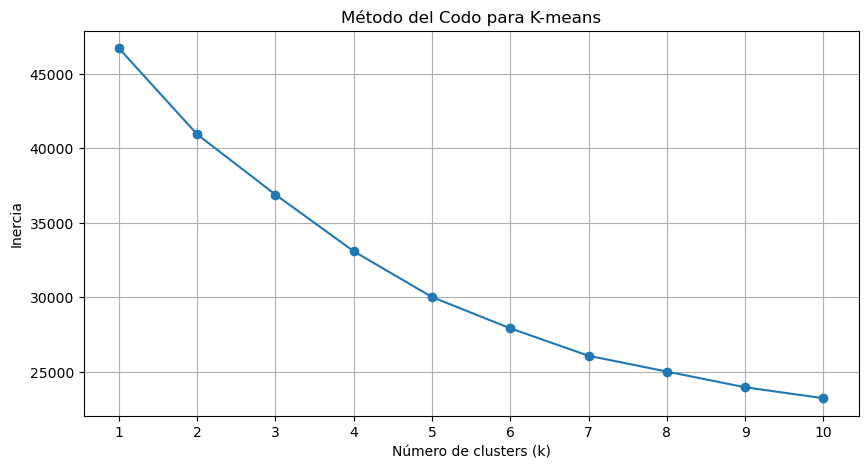

In [ ]:
X = df.values
inercia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, random_state= 32)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,11), inercia, marker= "o")
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.xticks(np.arange(1, 11, 1))
plt.grid()

### El método del codo no nos da la mejor respuesta asi que lo haremos con otra técnica

### Técnica de la silueta

In [ ]:
from sklearn.metrics import silhouette_score

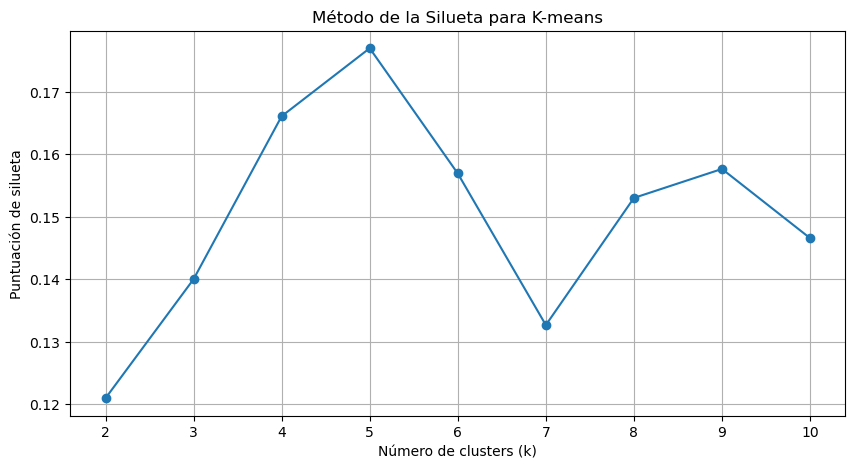

In [ ]:
resultados = []

k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    resultados.append(silhouette_avg)

optimal_k = k_range[np.argmax(resultados)]

plt.figure(figsize=(10, 5))
plt.plot(k_range, resultados, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Puntuación de silueta')
plt.title('Método de la Silueta para K-means')
plt.xticks(k_range)
plt.grid()
plt.show()

### El mejor número de K va a ser de 5

In [ ]:
kmeans = KMeans(n_clusters=5, init= "k-means++", random_state=32)
clusters = kmeans.fit_predict(df)
df["cluster"] = clusters

In [ ]:
df['cluster']

### Agrupación por clusters

In [ ]:
cluster_air = df.groupby("cluster").mean()
cluster_air

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,stars,type,bedrooms,baths,bath_type,beds,frecuencia_host
cluster,,,,,,,,,,,,,,,,,
0,0.119321,-0.551799,1.605360,-0.230997,-0.301096,-0.072344,-0.218648,-0.186309,0.083209,-0.183562,-0.041814,-0.215109,1.750262,1.277771,0.089212,1.627105,-0.203248
1,-0.105592,-0.235753,-0.028014,0.690398,-0.632633,-0.901842,-0.428663,0.473982,0.258954,-0.445613,-1.347789,0.412209,-0.229692,-0.260695,-0.537967,-0.265051,0.544445
2,0.058960,-0.324940,-0.229459,-0.495460,1.760852,0.802839,2.003565,-0.194755,-0.245654,1.978101,0.705208,-0.119642,-0.289618,-0.302308,-0.365631,-0.106002,-0.211811
3,0.064135,-0.528736,-0.255666,-0.090999,-0.028688,0.404596,-0.229217,-0.272336,-0.127308,-0.221323,0.577908,-0.009956,-0.239876,-0.324935,-0.597800,-0.188664,-0.284670
4,-0.117759,1.676299,-0.479036,-0.065713,-0.243986,-0.232095,-0.326389,0.225363,0.052826,-0.329794,-0.032884,-0.172470,-0.363619,0.130307,1.686882,-0.447058,0.197925


### Representación visual

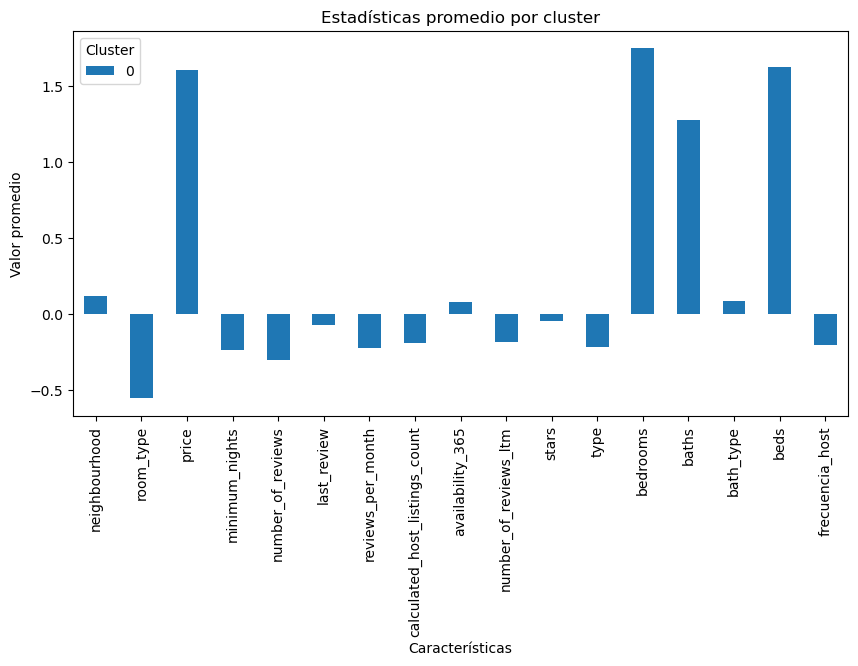

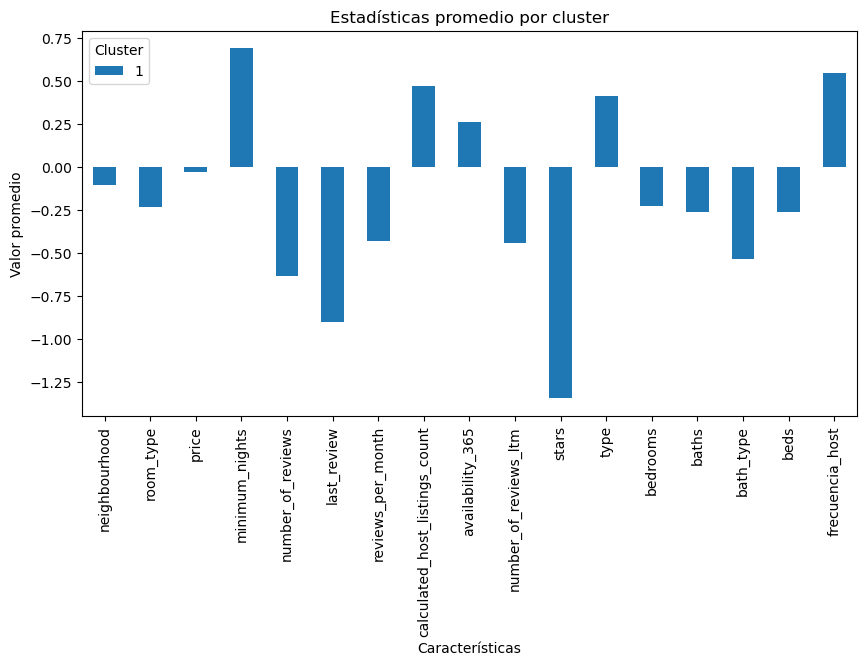

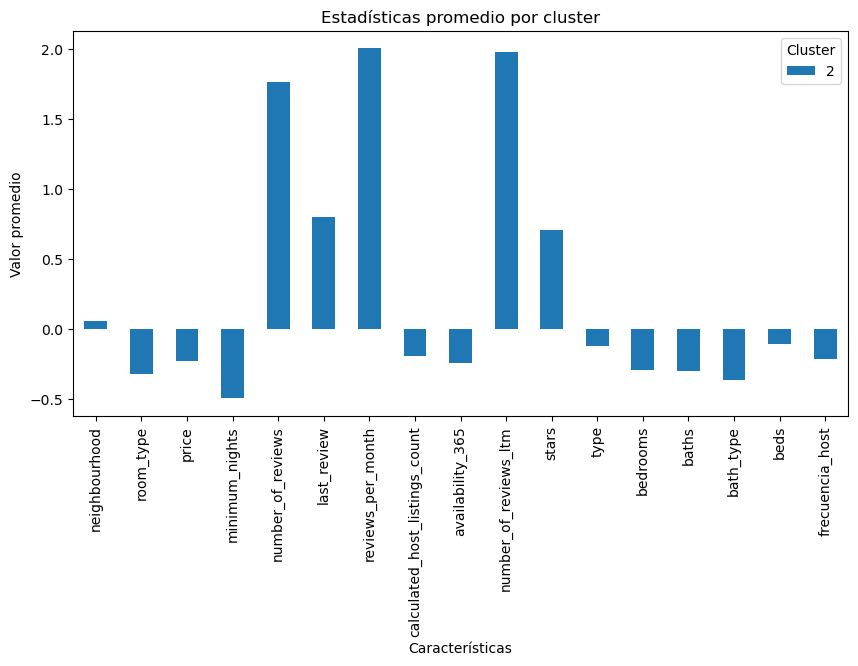

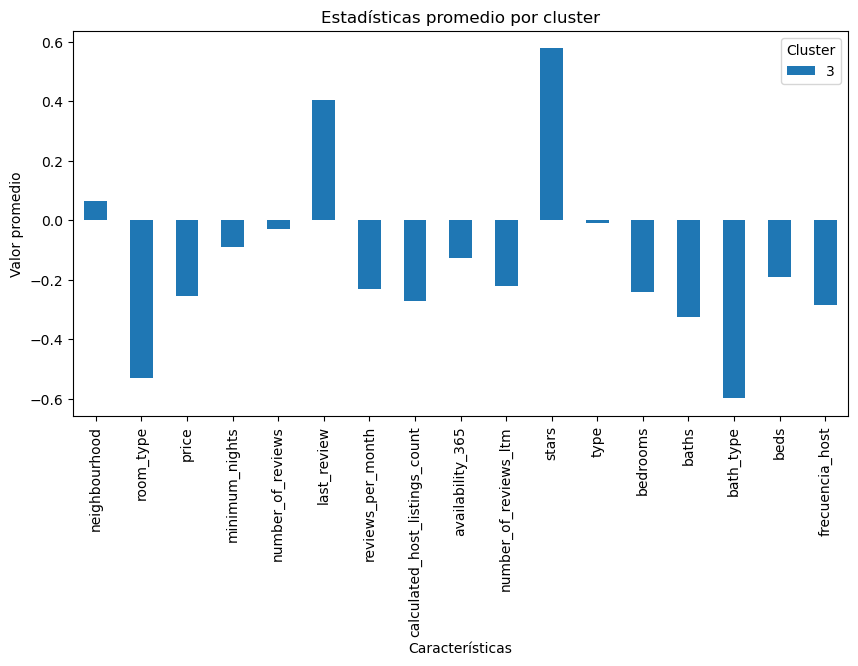

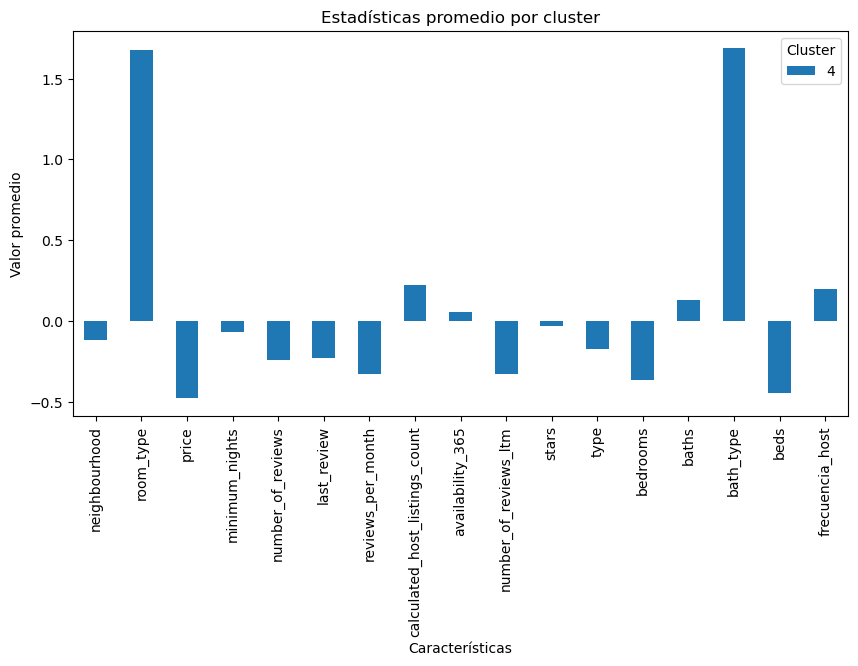

In [ ]:
for x in list(range(0,5)):
    cluster_air.loc[x].plot(kind="bar", figsize=(10,5))
    plt.xlabel('Características')
    plt.ylabel('Valor promedio')
    plt.title('Estadísticas promedio por cluster')
    plt.legend(title='Cluster')
    plt.show()

## Resultados de los clusters

Cluster 0: Las casas mas costosas, consecuentemente tienen mas baños, recamaras, camas, etc.

Cluster 1: Es el cluster que peores reviews tiene y el número de reviews es por debajo del promedio, pero al mismo tiempo tiene la característica que sus hosts tienen varios lugares a su nombre. 

Cluster 2: Es el conjunto de los lugares con mas reseñas, no tienen ninguna característica especial además de que so los que mas reviews tienen.

Cluster 3: El cluster con mejores reseñas. Lo curiosos es que son lugares bastante sencillos, con un número bajo de cuartos, baños y camas. Además el tipo de cuarto y de baños que tiene no es de los mejorcitos. Probablemente sean lugares sencillos, pero que cumplen.

Cluster 4: Probablemente se refiera a lugares que son un excelente tipo de cuarto (por ejemplo, cuarto de hotel) y que tiene el mejor tipo de baño (baño prrivado completo)